In [1]:
#  Importing two csv in one data frame

import pandas as pd

# Assuming your CSV files are named 'file1.csv' and 'file2.csv'
df1 = pd.read_csv("C:\\Users\\moham\\Desktop\\Titanic_train.csv")
df2 = pd.read_csv('C:\\Users\\moham\\Desktop\\Titanic_test.csv')

# Concatenate the two DataFrames vertically (row-wise)
combined_df = pd.concat([df1, df2], ignore_index=True)

print(combined_df)

      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [2]:
# 	Check for missing values.

missing_values = combined_df.isnull().sum()
print(missing_values)


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


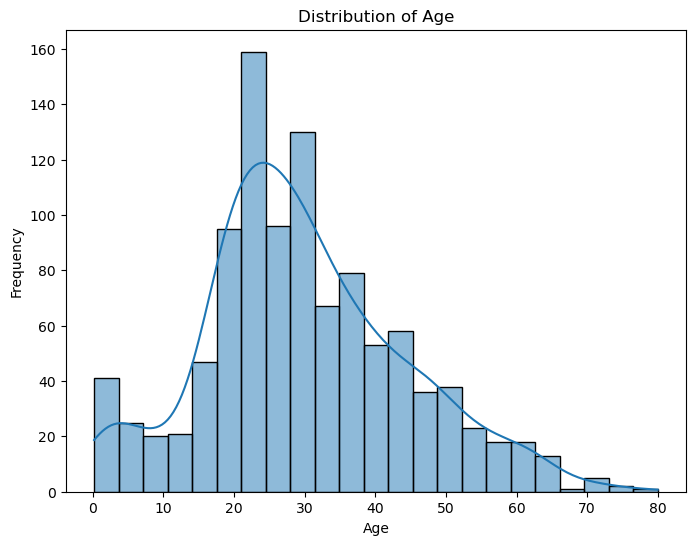

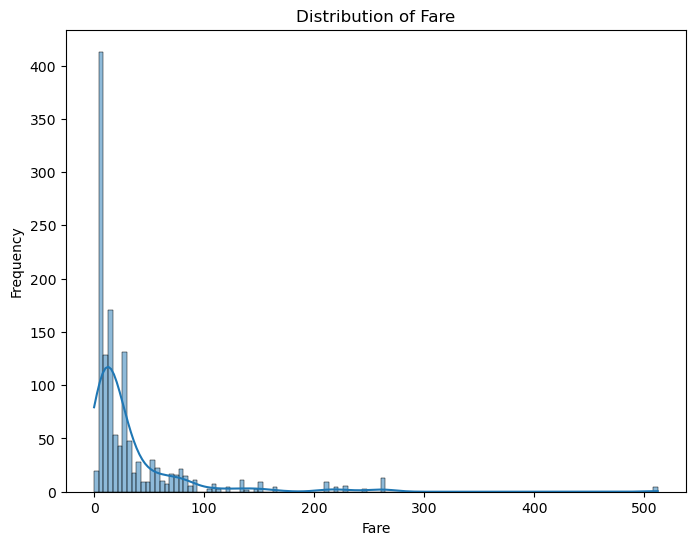

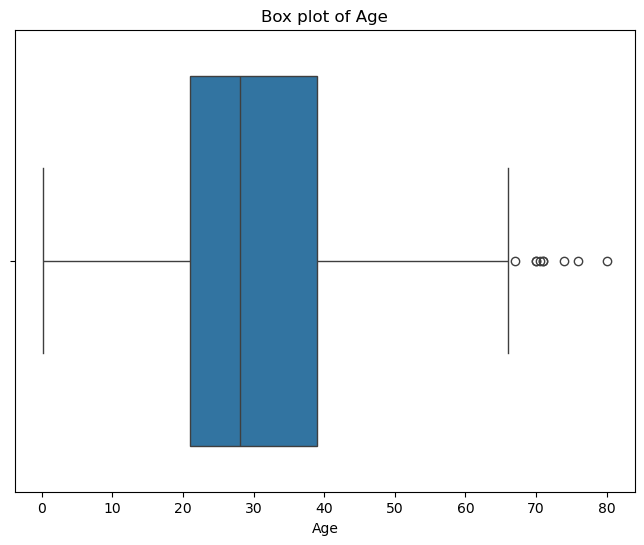

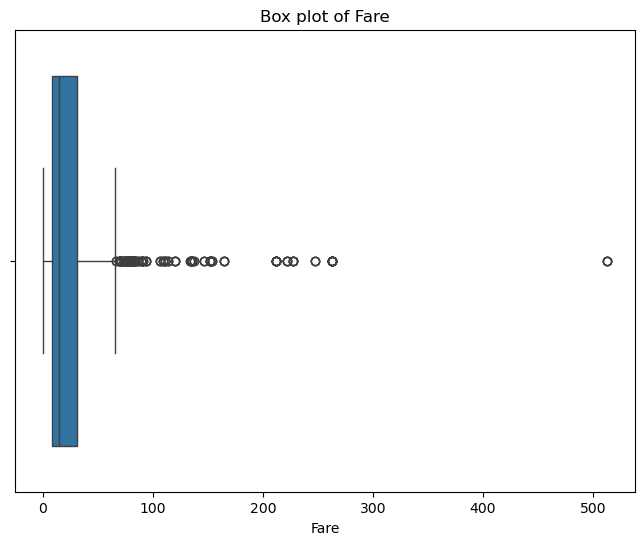

In [3]:
# .	Explore data distributions using histograms and box plots

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
numerical_features = ['Age', 'Fare']  # Replace with your actual numerical features
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(combined_df[feature], kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

# Box plots for numerical features
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=combined_df[feature])
  plt.title(f'Box plot of {feature}')
  plt.xlabel(feature)
  plt.show()


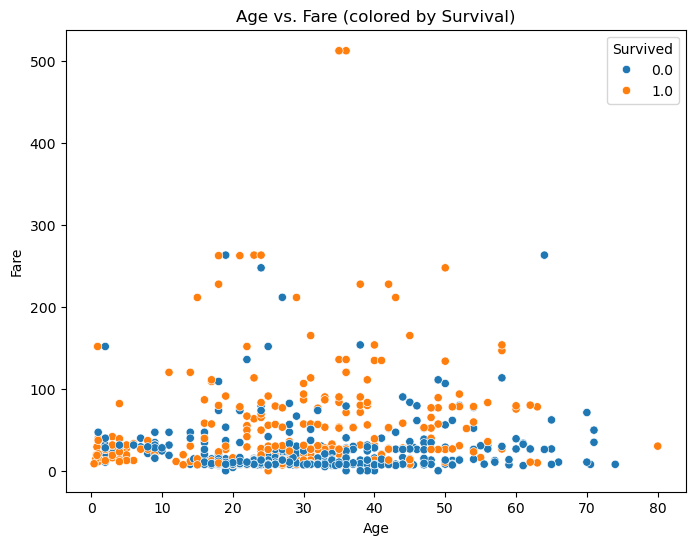

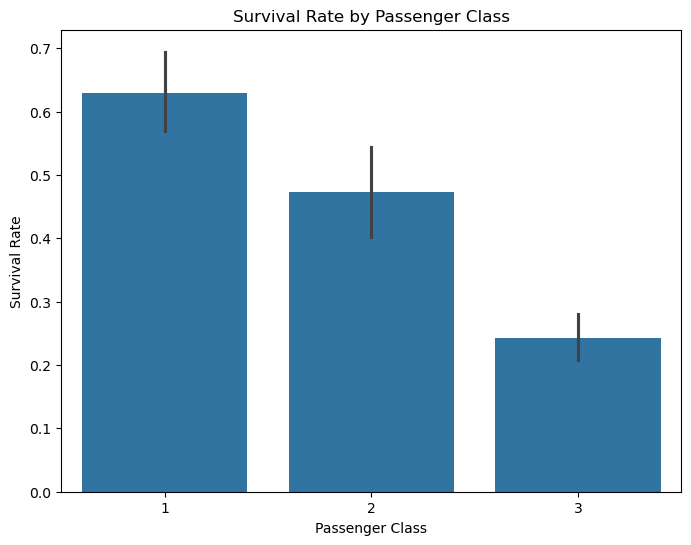

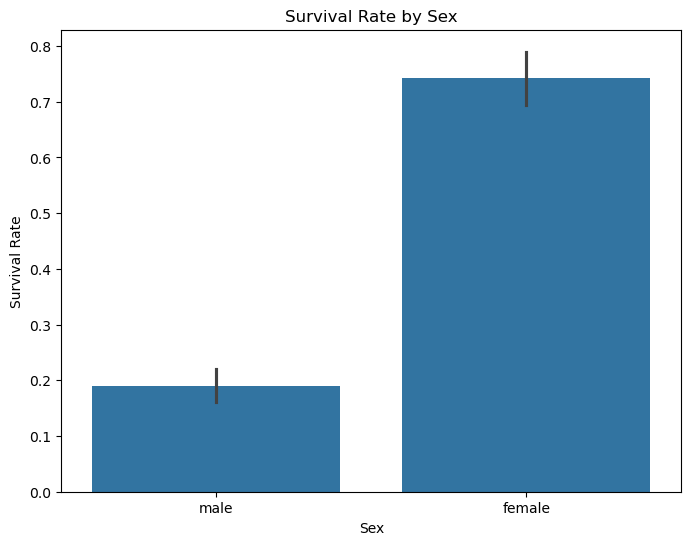

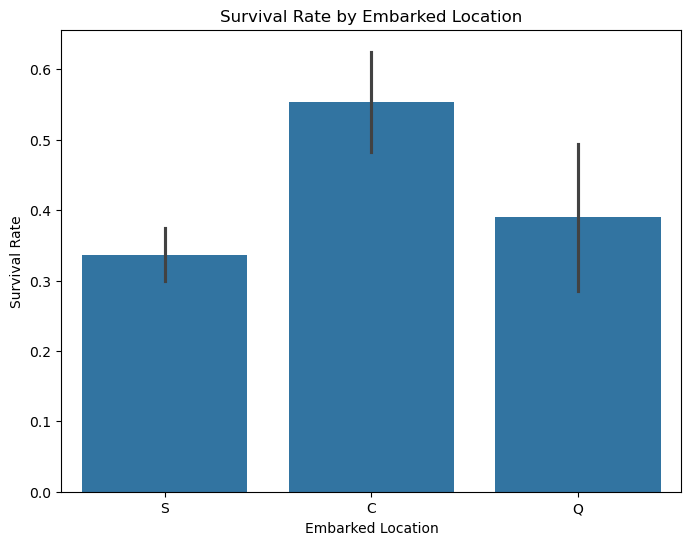

In [4]:
# 4.	Visualize relationships between features and survival using scatter plots and bar plots.

import matplotlib.pyplot as plt
# Scatter plot: Age vs. Fare, colored by survival
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=combined_df)
plt.title('Age vs. Fare (colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Bar plot: Survival rate by Pclass
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=combined_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Bar plot: Survival rate by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=combined_df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Bar plot: Survival rate by Embarked (if available)
if 'Embarked' in combined_df.columns:
  plt.figure(figsize=(8, 6))
  sns.barplot(x='Embarked', y='Survived', data=combined_df)
  plt.title('Survival Rate by Embarked Location')
  plt.xlabel('Embarked Location')
  plt.ylabel('Survival Rate')
  plt.show()


In [5]:
#  Data Preprocessing:
# 1.	Impute missing values

# Impute missing values in 'Age' with the median age
combined_df['Age'].fillna(combined_df['Age'].median(), inplace=True)

# Impute missing values in 'Embarked' with the most frequent value (mode)
if 'Embarked' in combined_df.columns:
  combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)

# Impute missing values in 'Fare' with the median fare
combined_df['Fare'].fillna(combined_df['Fare'].median(), inplace=True)


# Check for missing values again
missing_values_after_imputation = combined_df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after_imputation)


Missing values after imputation:
 PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64


C:\Users\moham\AppData\Local\Temp\ipykernel_23628\3166931532.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Age'].fillna(combined_df['Age'].median(), inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_23628\3166931532.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [12]:
#  2.	Encode categorical variables using one-hot encoding or label encoding.

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select categorical features to encode
categorical_features = ['Sex', 'Embarked', 'Pclass']  # Add other categorical features if needed

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the encoder on the categorical features
encoded_features = encoder.fit_transform(combined_df[categorical_features])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the original DataFrame
combined_df = pd.concat([combined_df, encoded_df], axis=1)

# Drop the original categorical features (optional)
combined_df.drop(categorical_features, axis=1, inplace=True)

print(combined_df.head())


   PassengerId  Survived                                               Name  \
0            1       0.0                            Braund, Mr. Owen Harris   
1            2       1.0  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       1.0                             Heikkinen, Miss. Laina   
3            4       1.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       0.0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  Sex_female  Sex_male  \
0  22.0      1      0         A/5 21171   7.2500   NaN         0.0       1.0   
1  38.0      1      0          PC 17599  71.2833   C85         1.0       0.0   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN         1.0       0.0   
3  35.0      1      0            113803  53.1000  C123         1.0       0.0   
4  35.0      0      0            373450   8.0500   NaN         0.0       1.0   

   Embarked_C  Embarked_Q  Embarked_S  Pclas

In [14]:
# 3.	If needed you can apply more preprocessing methods on the given dataset.

import numpy as np
# Apply more preprocessing methods as needed

# Example: Scaling numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler

numerical_features_to_scale = ['Age', 'Fare']
scaler = StandardScaler()
combined_df[numerical_features_to_scale] = scaler.fit_transform(combined_df[numerical_features_to_scale])

# Example: Feature engineering (creating new features)
# For example, create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1

# Example: Removing irrelevant features
# For example, remove 'PassengerId' and 'Name' if they are not useful for the model
combined_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Example: Log transformation of skewed features
# For example, if 'Fare' is highly skewed, apply log transformation
# combined_df['Fare'] = np.log1p(combined_df['Fare'])


print(combined_df.head())


   Survived       Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0       0.0 -0.581628      1      0 -0.503291         0.0       1.0   
1       1.0  0.658652      1      0  0.734744         1.0       0.0   
2       1.0 -0.271558      0      0 -0.490240         1.0       0.0   
3       1.0  0.426099      1      0  0.383183         1.0       0.0   
4       0.0  0.426099      0      0 -0.487824         0.0       1.0   

   Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  \
0         0.0         0.0         1.0       0.0       0.0       1.0   
1         1.0         0.0         0.0       1.0       0.0       0.0   
2         0.0         0.0         1.0       0.0       0.0       1.0   
3         0.0         0.0         1.0       1.0       0.0       0.0   
4         0.0         0.0         1.0       0.0       0.0       1.0   

   FamilySize  
0           2  
1           2  
2           1  
3           2  
4           1  


In [16]:
#  Building Predictive Models:
# 1.	Split the preprocessed dataset into training and testing sets.

from sklearn.model_selection import train_test_split

# Assuming 'Survived' is your target variable
X = combined_df.drop('Survived', axis=1)
y = combined_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1047, 13)
X_test shape: (262, 13)
y_train shape: (1047,)
y_test shape: (262,)


In [18]:
#  2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have a trained model named 'model' and predictions named 'y_pred'

def evaluate_model(y_true, y_pred):
  """Evaluates the model using various metrics.

  Args:
    y_true: True labels.
    y_pred: Predicted labels.
  """
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-score:", f1)


# Example usage:
# After training your model and getting predictions (y_pred) on the test set:
# evaluate_model(y_test, y_pred)


In [25]:
# 3.    Build predictive models using LightGBM and XGBoost algorithms.
!pip install Xgboost
!pip install lightgbm

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

# Initialize XGBoost and LightGBM classifiers
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

# Check for NaN values in y_train and handle them (e.g., remove rows with NaN)
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index] # Use .loc to select rows based on index values

# Check for NaN values in y_test and handle them (e.g., remove rows with NaN)
y_test = y_test.dropna()
X_test = X_test.loc[y_test.index] # Use .loc to select rows based on index values

# Train and evaluate XGBoost using cross-validation
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Accuracy:", xgb_scores.mean())

# Train and evaluate LightGBM using cross-validation
lgbm_scores = cross_val_score(lgbm_model, X_train, y_train, cv=5, scoring='accuracy')
print("LightGBM Cross-Validation Accuracy:", lgbm_scores.mean())

# Train the models on the entire training set
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)
lgbm_y_pred = lgbm_model.predict(X_test)

# Evaluate the models
print("\nXGBoost Model Evaluation:")
evaluate_model(y_test, xgb_y_pred)

print("\nLightGBM Model Evaluation:")
evaluate_model(y_test, lgbm_y_pred)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 2.9 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 3.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 3.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.5 MB/s eta 0:00:00
XGBoost Cross-Validation Accuracy: 0.7968531468531468
[LightGBM] [Info] Number of positive: 215, n

In [27]:
#  4.	Train the models on the training set and evaluate their performance on the testing set.
# 5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
}

# Create a GridSearchCV object for XGBoost
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
xgb_grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best XGBoost parameters:", xgb_grid.best_params_)
print("Best XGBoost accuracy:", xgb_grid.best_score_)

# Train the XGBoost model with the best parameters
best_xgb_model = XGBClassifier(**xgb_grid.best_params_, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
best_xgb_y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
print("\nBest XGBoost Model Evaluation:")
evaluate_model(y_test, best_xgb_y_pred)


# Define the parameter grid for LightGBM
lgbm_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
}

# Create a GridSearchCV object for LightGBM
lgbm_grid = GridSearchCV(estimator=lgbm_model, param_grid=lgbm_param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
lgbm_grid.fit(X_train, y_train)

# Print the best parameters and score
print("\nBest LightGBM parameters:", lgbm_grid.best_params_)
print("Best LightGBM accuracy:", lgbm_grid.best_score_)

# Train the LightGBM model with the best parameters
best_lgbm_model = LGBMClassifier(**lgbm_grid.best_params_, random_state=42)
best_lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
best_lgbm_y_pred = best_lgbm_model.predict(X_test)

# Evaluate the model
print("\nBest LightGBM Model Evaluation:")
evaluate_model(y_test, best_lgbm_y_pred)


Best XGBoost parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Best XGBoost accuracy: 0.8274572649572649

Best XGBoost Model Evaluation:
Accuracy: 0.8197674418604651
Precision: 0.828125
Recall: 0.726027397260274
F1-score: 0.7737226277372263
[LightGBM] [Info] Number of positive: 215, number of negative: 360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 575, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373913 -> initscore=-0.515466
[LightGBM] [Info] Start training from score -0.515466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

      Model  Accuracy  Precision    Recall  F1-score
0   XGBoost  0.750000   0.697368  0.726027  0.711409
1  LightGBM  0.773256   0.723684  0.753425  0.738255


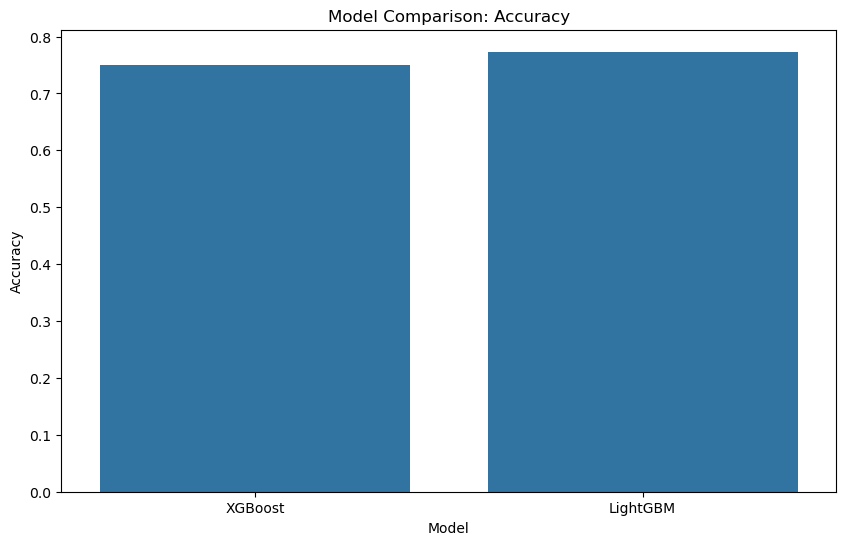

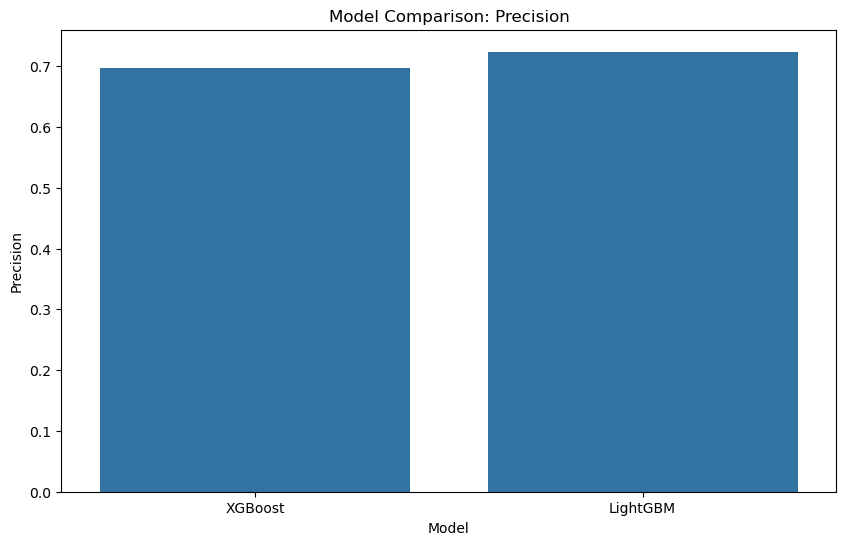

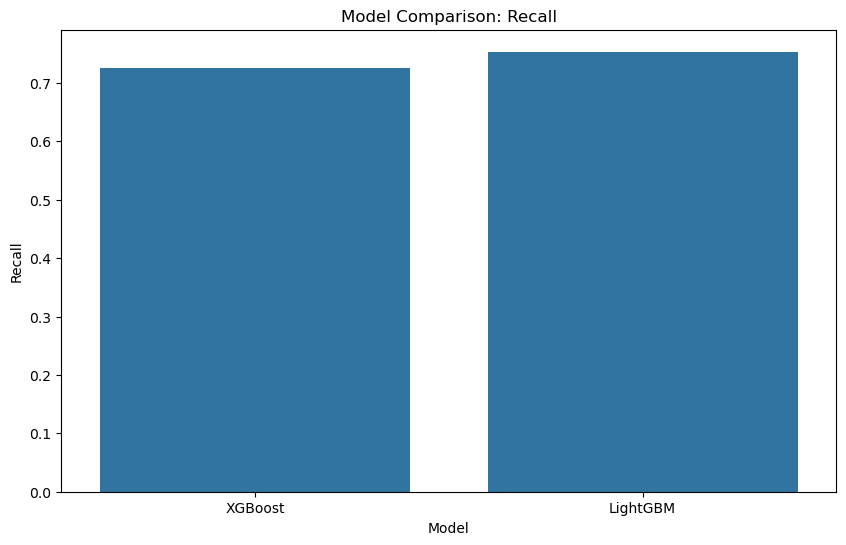

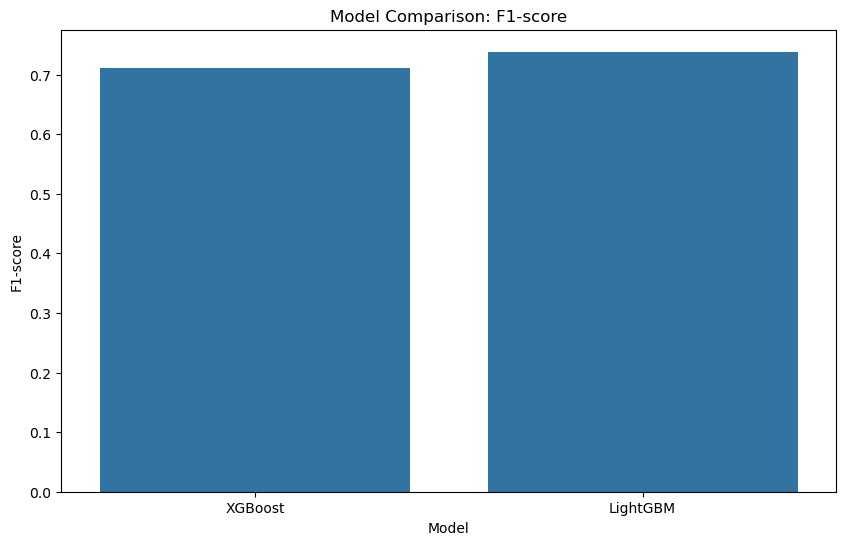

In [29]:
#  1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame to store the performance metrics
performance_df = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM'],
    'Accuracy': [accuracy_score(y_test, xgb_y_pred), accuracy_score(y_test, lgbm_y_pred)],
    'Precision': [precision_score(y_test, xgb_y_pred), precision_score(y_test, lgbm_y_pred)],
    'Recall': [recall_score(y_test, xgb_y_pred), recall_score(y_test, lgbm_y_pred)],
    'F1-score': [f1_score(y_test, xgb_y_pred), f1_score(y_test, lgbm_y_pred)]
})

# Display the performance DataFrame
print(performance_df)

# You can also visualize the performance metrics using bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df)
plt.title('Model Comparison: Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=performance_df)
plt.title('Model Comparison: Precision')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=performance_df)
plt.title('Model Comparison: Recall')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-score', data=performance_df)
plt.title('Model Comparison: F1-score')
plt.show()


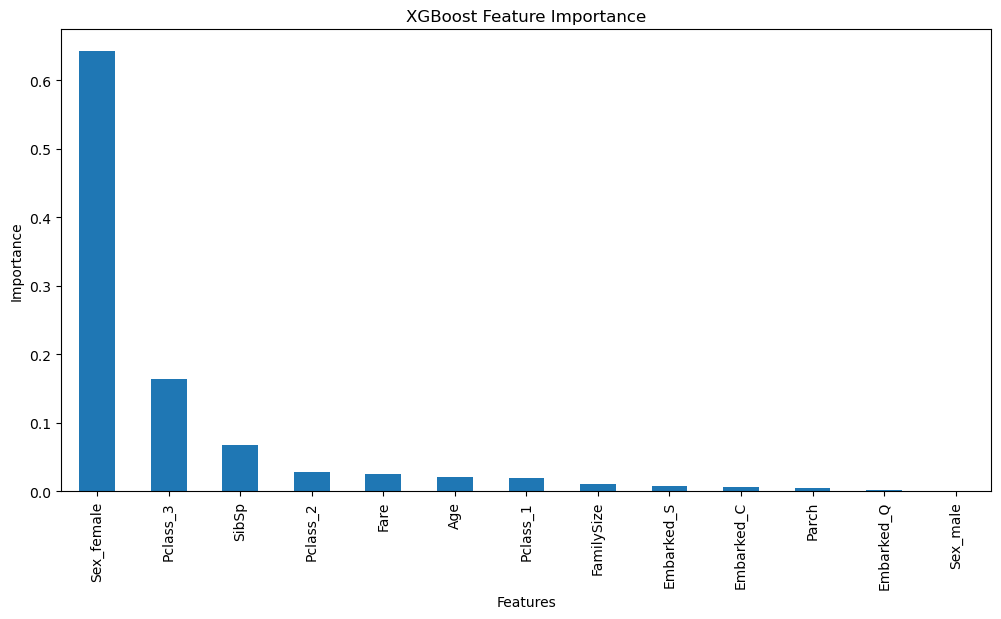

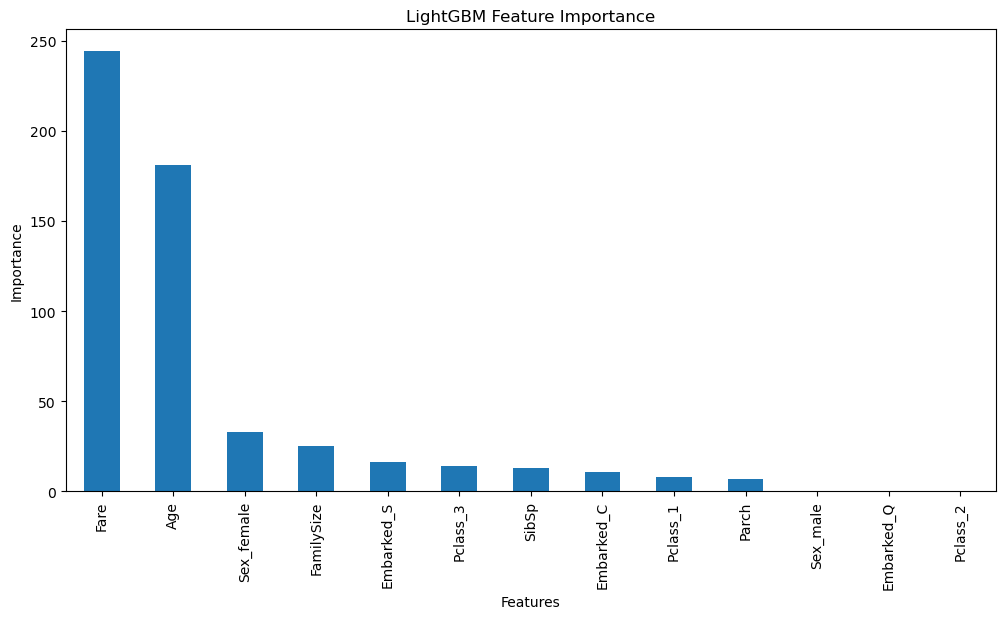

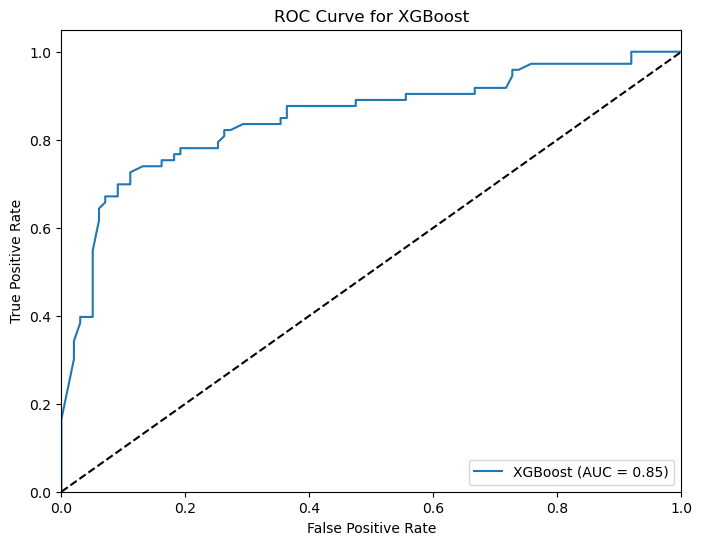

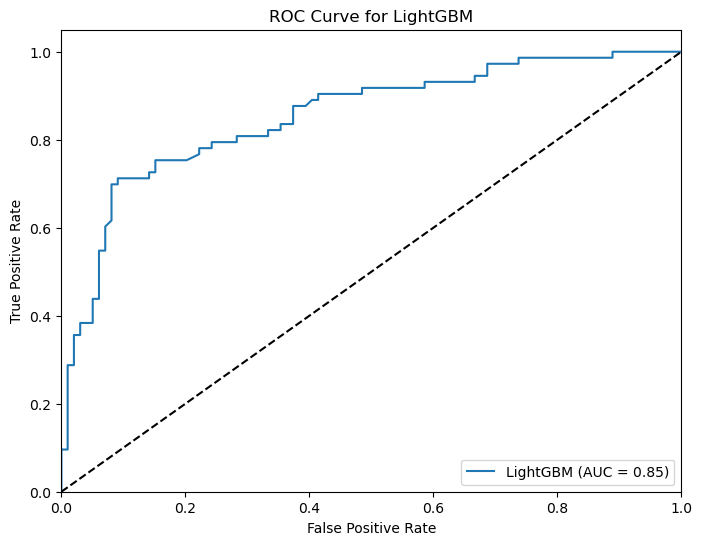

Confusion matrix, without normalization
[[88 11]
 [20 53]]


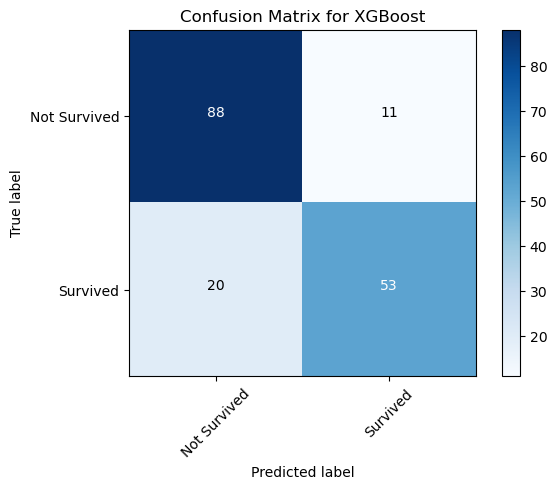

Confusion matrix, without normalization
[[84 15]
 [18 55]]


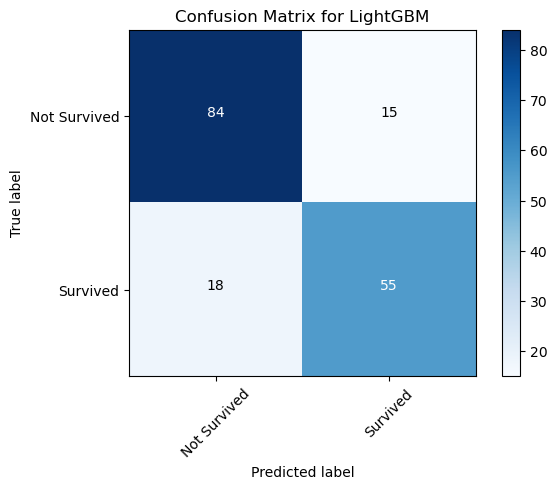

In [31]:
# 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Visualize feature importance for XGBoost
plt.figure(figsize=(12, 6))
xgb_feature_importance = pd.Series(best_xgb_model.feature_importances_, index=X_train.columns)
xgb_feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('XGBoost Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Visualize feature importance for LightGBM
plt.figure(figsize=(12, 6))
lgbm_feature_importance = pd.Series(best_lgbm_model.feature_importances_, index=X_train.columns)
lgbm_feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('LightGBM Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# ROC Curve and AUC for XGBoost
from sklearn.metrics import roc_curve, auc

xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:,1])
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()


# ROC Curve and AUC for LightGBM
lgbm_fpr, lgbm_tpr, lgbm_thresholds = roc_curve(y_test, best_lgbm_model.predict_proba(X_test)[:,1])
lgbm_roc_auc = auc(lgbm_fpr, lgbm_tpr)

plt.figure(figsize=(8, 6))
plt.plot(lgbm_fpr, lgbm_tpr, label='LightGBM (AUC = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for XGBoost
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


xgb_cm = confusion_matrix(y_test, best_xgb_y_pred)
plot_confusion_matrix(xgb_cm, classes=['Not Survived', 'Survived'],
                      title='Confusion Matrix for XGBoost')

# Confusion Matrix for LightGBM
lgbm_cm = confusion_matrix(y_test, best_lgbm_y_pred)
plot_confusion_matrix(lgbm_cm, classes=['Not Survived', 'Survived'],
                      title='Confusion Matrix for LightGBM')


# Interpretation of the Results
# Based on the accuracy, precision, recall, F1-score, feature importance, ROC curves, and confusion matrices,
# analyze the performance of each model:

# - Which model has better overall accuracy?
# - Which model is better at identifying true positives (survivors)?
# - Which model has a lower false positive rate?
# - Which features are most important for each model?
# - Is there any significant difference in the performance of the two models?
# - Are there any specific scenarios where one model performs better than the other?
